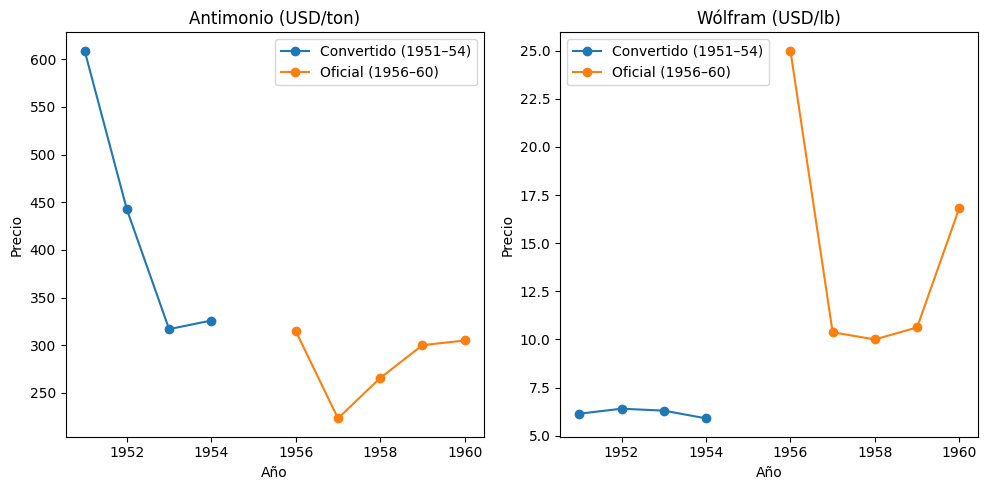

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# -------------------------------
# 1. Datos nuevos en U.10d
# -------------------------------
datos_nuevos = {
    'año': [1951, 1952, 1953, 1954],
    'antimonio_u10kg': [6.09, 4.425, 3.17, 3.26],
    'wolfram_u10lb': [61.42, 64, 63, 59],
}
df_nuevo = pd.DataFrame(datos_nuevos).set_index('año')

# -------------------------------
# 2. Conversión a unidades oficiales
# -------------------------------
df_nuevo['antimonio_ton'] = df_nuevo['antimonio_u10kg'] * 100  # de USD/10kg a USD/tonelada
df_nuevo['wolfram_lb'] = df_nuevo['wolfram_u10lb'] * 0.1       # de USD/10lb a USD/lb

# -------------------------------
# 3. Cargar datos oficiales desde 1956
# -------------------------------
conn = sqlite3.connect('../../db/proyectomacro.db')
df_oficial = pd.read_sql_query(
    "SELECT año, antimonio, wolfram FROM precio_oficial_minerales WHERE año BETWEEN 1956 AND 1960",
    conn
).set_index('año')
conn.close()

# -------------------------------
# 4. Comparación visual
# -------------------------------
plt.figure(figsize=(10, 5))

# Antimonio
plt.subplot(1, 2, 1)
plt.plot(df_nuevo.index, df_nuevo['antimonio_ton'], label='Convertido (1951–54)', marker='o')
plt.plot(df_oficial.index, df_oficial['antimonio'], label='Oficial (1956–60)', marker='o')
plt.title('Antimonio (USD/ton)')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.legend()

# Wolfram
plt.subplot(1, 2, 2)
plt.plot(df_nuevo.index, df_nuevo['wolfram_lb'], label='Convertido (1951–54)', marker='o')
plt.plot(df_oficial.index, df_oficial['wolfram'], label='Oficial (1956–60)', marker='o')
plt.title('Wólfram (USD/lb)')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.legend()

plt.tight_layout()
plt.show()


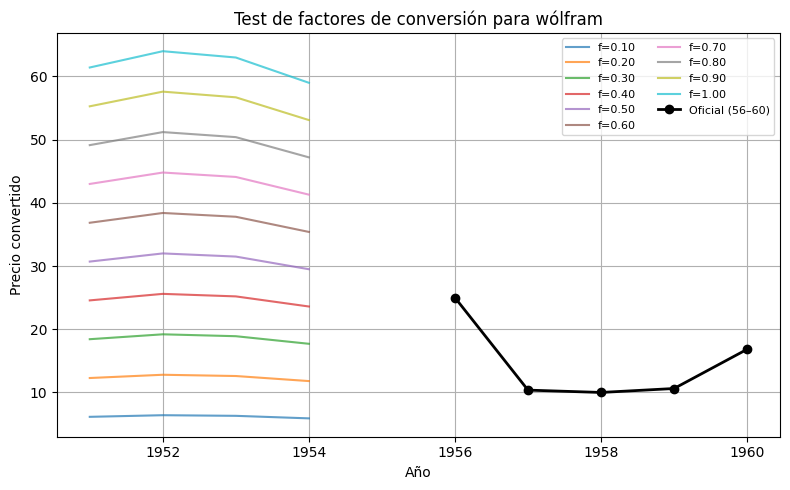

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

# 1) Carga datos nuevos (51–54) y oficiales (56–60)
datos_nuevos = {
    'año': [1951,1952,1953,1954],
    'wolfram_u10': [61.42,64,63,59],
}
df_nuevo = pd.DataFrame(datos_nuevos).set_index('año')

conn = sqlite3.connect('../../db/proyectomacro.db')
df_oficial = pd.read_sql_query(
    "SELECT año, wolfram FROM precio_oficial_minerales WHERE año BETWEEN 1956 AND 1960",
    conn
).set_index('año')
conn.close()

# 2) Definir lista de factores a probar
factores = np.linspace(0.1, 1.0, 10)   # de 0.1 a 1.0 paso 0.1

plt.figure(figsize=(8,5))
# 3) Por cada factor, convierte y dibuja la serie "nueva" extendida hasta 1960
for f in factores:
    conv = df_nuevo['wolfram_u10'] * f
    # reindex para solapar el tramo 56–60 con NaNs
    conv = conv.reindex(range(1951,1961))
    plt.plot(conv.index, conv, label=f'f={f:.2f}', alpha=0.7)

# 4) Añade la serie oficial
plt.plot(df_oficial.index, df_oficial['wolfram'], 'k-o', linewidth=2, label='Oficial (56–60)')

plt.legend(fontsize=8, ncol=2)
plt.title("Test de factores de conversión para wólfram")
plt.xlabel("Año")
plt.ylabel("Precio convertido")
plt.grid(True)
plt.tight_layout()
plt.show()
